# Generate 

 - for two use cases

In [1]:
#def degrees_to_cardinal(d):
#    '''
#    note: this is highly approximate...
#    '''
#    dirs = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
#            "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
#    ix = int((d + 11.25)/22.5)
#    return dirs[ix % 16]

textures  = ["Asphalt", "Gravel", "Cobble"]

import uuid
import pandas as pd
import seaborn as sns


In [2]:
class PathSegment:
    '''Class for keeping track of an item in inventory.'''
    def __init__(self, segid, length, texture, direction, width):
        self.segid = segid
        self.length = length
        self.texture = texture
        self.direction = direction
        self.width = width
        
    def __repr__(self):
        return f"{self.segid}: {self.length} - {self.direction} - {self.texture}"
    
    

In [3]:
import random
random.randint(50,300)

59

In [4]:
segs = []
n_sim = 10000
for i in range(1,n_sim):
    p = PathSegment(segid = str(uuid.uuid1())[0:8],
                length=random.random()*10,
                texture=textures[random.randint(0,2)],
                #direction = degrees_to_cardinal(random.randint(0,180)),
                direction = random.randint(0,359),
                width = random.randint(50,300)
               )
    segs.append(p)
    

In [5]:
class Condition:
    
    def __init__(self, temp, rain, wind, winddir, busy):
        self.temp = temp
        self.rain = rain 
        self.wind = wind
        self.winddir = winddir
        self.busy = busy
        
    temp: float # -20 to 20
    rain: float # 0 - 22mm
    wind: int # kmh
    winddir: int # degree
    busy: float #0-1

friday_afternoon =  Condition(24, 0, 4, 59,0.95)
rainy_november = Condition(temp=3, rain=22, wind=20, winddir=87, busy=0.1)

In [6]:
median_speed = 12.3

def adapt_median_speed(condition, segment):
    m = median_speed
    if segment.texture == "Gravel":
        m = 9.8
    elif segment.texture == "Cobble":
        m = 11.4
    
    # per 10 mm of rainfall penalize 0.1 kmh
    m = m - condition.rain/10
    
    # wind
    dirs = condition.winddir, segment.direction
    degree_diff = (max(dirs) - min(dirs)) 
    degree_diff = degree_diff -180 if degree_diff > 180 else degree_diff # 0 = headwind, 180 = tailwind
    # wind penalization: 10kmh wind -> -+ 0.1kmh
    tail_or_head = 1 if degree_diff-90 > 0 else -1
    degree_effect = abs(90-degree_diff)/90 * tail_or_head
    wind_effect = (condition.wind/10 * degree_effect)
    m = m + wind_effect
    
    
    return m
    

In [7]:
192.168.203.185:5432


SyntaxError: invalid syntax (<ipython-input-7-6e9d7221dd65>, line 1)

In [8]:
#pd.read_csv("../Downloads/HACKATHON_EFFICIENCY_CALL_A_BIKE.head.csv",sep=";").head().T

In [9]:
sim = pd.Series([adapt_median_speed(friday_afternoon, s) for s in segs], name="avg").to_frame()\
            .assign(cond="summer_friday").append(
      pd.Series([adapt_median_speed(rainy_november, s) for s in segs], name="avg").to_frame()\
            .assign(cond="cold_november"),sort=False
    ).reset_index()
sim["id"] = [s.segid for s in segs]+[s.segid for s in segs]
sim["texture"] = [s.texture for s in segs]+[s.texture for s in segs]
sim["direction"] = [s.direction for s in segs]+[s.direction for s in segs]
sim["index"] = [i for i in range(1,n_sim)] + [i for i in range(1,n_sim)]

sim=sim.sort_values(["cond","texture","direction"])#.drop(["index"],axis=1).reset_index(drop=True).reset_index()


In [12]:
sim.to_csv("simulated-speeds.tsv",sep='\t')

/Users/michael/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


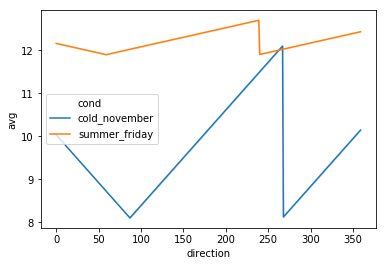

In [12]:
sns.lineplot(data=sim.query("texture=='Asphalt'"), x="direction", y="avg", hue="cond")

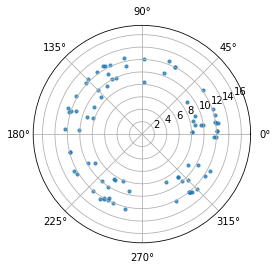

In [355]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = sim.query('texture=="Asphalt"').avg
#theta = 2 * np.pi * np.random.rand(n_sim)
theta =  sim.query('texture=="Asphalt"').direction

area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, s=10, cmap='hsv', alpha=0.75)

In [345]:
r

array([1.40073461, 1.48550162, 1.41856002, 1.13349104, 1.95557067,
       1.41266969, 0.49583152, 0.3157667 , 1.39539704, 1.43991333,
       0.51548886, 0.68309357, 1.93752234, 1.3890142 , 0.93276652,
       1.40562539, 1.02357175, 1.85748274, 1.4795386 , 1.24487807,
       1.30309094, 0.79361522, 1.08647879, 1.59979906, 1.44308945,
       0.59072796, 0.32189176, 0.41225103, 0.26865077, 0.96121003,
       0.68504363, 0.72593858, 1.94583528, 0.22188722, 0.77652818,
       1.56613175, 1.94579452, 0.96641921, 0.67284221, 1.13483807,
       0.09588302, 0.77787406, 1.81260729, 0.32203642, 1.48724227,
       1.26594832, 0.64836004, 1.84475306, 0.47445288, 1.64789114,
       1.50121428, 0.22756891, 1.69072249, 1.84786426, 0.44167358,
       1.86610775, 0.97799749, 0.94943728, 0.17833494, 0.45989636,
       1.43187482, 0.99225232, 1.53297876, 1.79359464, 1.54444604,
       1.85434858, 1.22930405, 1.21812754, 1.36936973, 0.50202593,
       1.67567527, 0.23723123, 1.59446948, 1.89800853, 0.29612

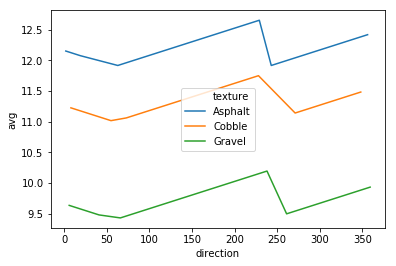

In [340]:
sns.lineplot(data=sim.query("cond=='summer_friday'"),x="direction", y="avg", hue="texture")

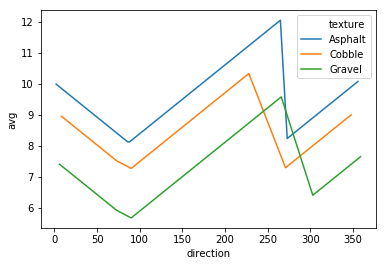

In [328]:
sns.lineplot(data=sim.query("cond=='cold_november'"), x="direction", y="avg", hue="texture")

In [326]:
print(adapt_median_speed(friday_afternoon, segs[0]))
print(adapt_median_speed(rainy_november, segs[0]))

11.926666666666668
11.611111111111112


NameError: name 'm' is not defined